In [1]:
%matplotlib notebook
# %autosave 10
# %lsmagic
# print(plt.style.available)

import numpy as np
from pylab import *
from matplotlib import gridspec
from matplotlib import pyplot as plt
import subprocess, os

#<span class="mark">read</span>

In [39]:
# ocean.npz
f = np.load('./spinel/ocean.npz')

cores0 = f['_cores']; E = f['_E']; Itot = f['_Itot']; Iatoms = f['_Iatom']  
# cores = f['_cores']; cores = np.array(cores, np.float)
# cores = [
#       cores[0][0]+cores[0][1],cores[0][0]+cores[0][1],
#       cores[1][0]+cores[1][1],cores[1][0]+cores[1][1],
#       cores[1][0]+cores[1][1],cores[1][0]+cores[1][1],
#       cores[2][0]+cores[2][1],cores[2][0]+cores[2][1],
#       cores[3][0]+cores[3][1],cores[3][0]+cores[3][1]
#      ]
cores = []
for i in cores0:
    cores.append(float(i[0])+float(i[1]))




# qerun.npz
readnpz = np.load('./spinel/qerun.npz')
efermi = readnpz['efermi']
bands_up = readnpz['bands_up']
bands_dw = readnpz['bands_dw']
kpoints = readnpz['kpoints']


In [40]:
cores

[-242.22355145999998, -242.91040716100002, -242.739405175, -242.35995690500002]

<IPython.core.display.Javascript object>


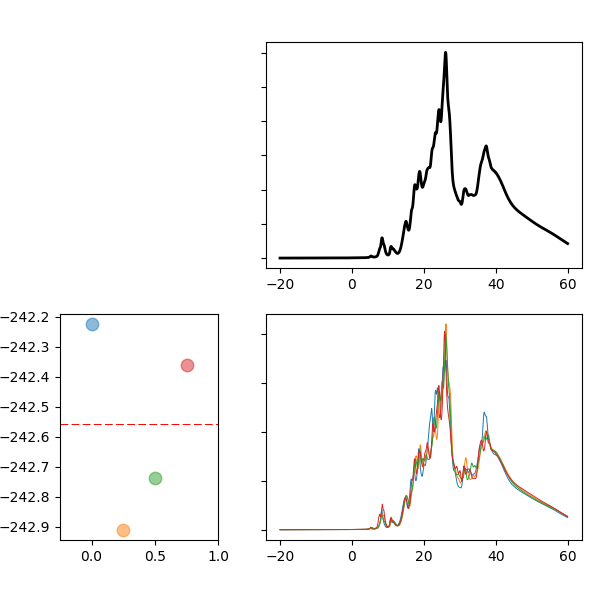

-242.558330175


In [49]:
fig = plt.figure(figsize=(6,6))

gs = gridspec.GridSpec(2, 2, width_ratios=[1,2])    
gs.update(top=0.93, bottom=0.1, left=0.1, right=0.97, wspace=0.2, hspace=0.2)

# bands
# ax = fig.add_subplot(gs[0])
# plt.setp(ax.get_yticklabels(), visible=True)
# plt.setp(ax.get_xticklabels(), visible=False)

# cores
ax = fig.add_subplot(gs[2])
# plt.setp(ax.get_yticklabels(), visible=True)
# plt.setp(ax.get_xticklabels(), visible=False)

x=0; dx = 1/len(cores); sums = 0.0
for i in cores:
    ax.plot(x,i,'o', ms=9, alpha=0.5);x=x+dx
ax.plot([-dx,1+dx],[sum(cores)/len(cores),sum(cores)/len(cores)], 'r--', lw=0.7)
ax.set_xlim([-dx,1])
print(sum(cores)/len(cores))

# Itotal
ax = fig.add_subplot(gs[1])
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=True)
ax.plot(E,Itot, 'k-', lw=2)

# Iatoms
ax = fig.add_subplot(gs[3])
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=True)
for i in Iatoms:
    ax.plot(E,i, '-', lw=0.7)

